<a href="https://www.kaggle.com/code/apttemi/kidney-disease-rfc?scriptVersionId=133334309" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ckdisease/kidney_disease.csv


# Aim
The aim of this project is to predict Chronic Disease Outcome
The dataset is available via UCI repostory [here](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease)

# Exploratory data analysis


In [2]:
df= pd.read_csv('/kaggle/input/ckdisease/kidney_disease.csv')
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
#change the id column to 'index'
df.set_index('id', inplace=True)

In [5]:
#check for and print NaN values
nan_values = df.isnull().sum()
print(nan_values)

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


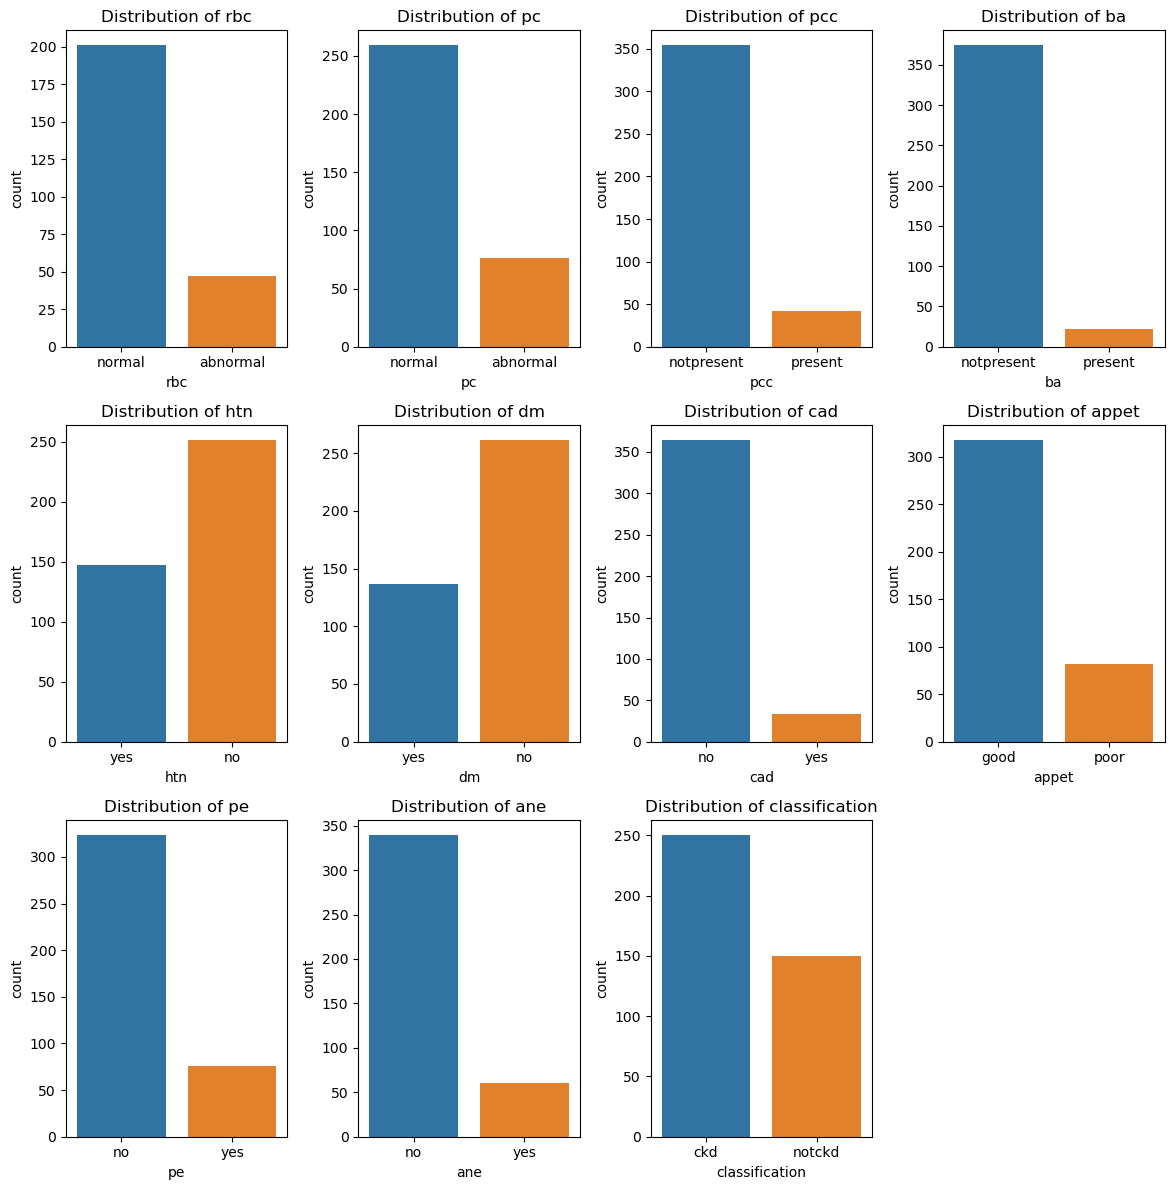

In [6]:
#plotting the categorical columns

import matplotlib.pyplot as plt
import seaborn as sns

# Create the subplots grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

plt.rcParams['font.family'] = 'DejaVu Sans'

#these columns have some white spaces, so trim
df['dm'] = df['dm'].str.strip() 
df['cad'] = df['cad'].str.strip() 
df['classification'] = df['classification'].str.strip() 

# Plot countplot on each subplot
sns.countplot(x='rbc', data=df, ax=axes[0, 0]).set(title='Distribution of rbc')
sns.countplot(x='pc', data=df, ax=axes[0, 1]).set(title='Distribution of pc')
sns.countplot(x='pcc', data=df, ax=axes[0, 2]).set(title='Distribution of pcc')
sns.countplot(x='ba', data=df, ax=axes[0, 3]).set(title='Distribution of ba')
sns.countplot(x='htn', data=df, ax=axes[1, 0]).set(title='Distribution of htn')
sns.countplot(x='dm', data=df, ax=axes[1, 1]).set(title='Distribution of dm')
sns.countplot(x='cad', data=df, ax=axes[1, 2]).set(title='Distribution of cad')
sns.countplot(x='appet', data=df, ax=axes[1, 3]).set(title='Distribution of appet')
sns.countplot(x='pe', data=df, ax=axes[2, 0]).set(title='Distribution of pe')
sns.countplot(x='ane', data=df, ax=axes[2, 1]).set(title='Distribution of ane')
sns.countplot(x='classification', data=df, ax=axes[2, 2]).set(title='Distribution of classification')




# Adjust subplot spacing
plt.tight_layout()
# Delete the last subplot
fig.delaxes(axes[2][3])
# Show the plot
plt.show()

In [7]:
#replace normal, present, yes, good and ckd with 1
#replace abnormal, not present , no,  poor and not ckd with 0

df['rbc'] = df['rbc'].replace({'normal': 1, 'abnormal': 0})
df['pc'] = df['pc'].replace({'normal': 1, 'abnormal': 0})
df['pcc'] = df['pcc'].replace({'present': 1, 'notpresent': 0})
df['ba'] = df['ba'].replace({'present': 1, 'notpresent': 0})
df['htn'] = df['htn'].replace({'yes': 1, 'no': 0})
df['dm'] = df['dm'].replace({'yes': 1, 'no': 0})
df['cad'] = df['cad'].replace({'yes': 1, 'no': 0})
df['appet'] = df['appet'].replace({'good': 1, 'poor': 0})
df['pe'] = df['pe'].replace({'yes': 1, 'no': 0})
df['ane'] = df['ane'].replace({'yes': 1, 'no': 0})
df['classification'] = df['classification'].replace({'ckd': 1, 'notckd': 0})

In [8]:
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,0.0,0.0,74.0,...,39,7800,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1
6,68.0,70.0,1.010,0.0,0.0,NaN,1.0,0.0,0.0,100.0,...,36,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
7,24.0,NaN,1.015,2.0,4.0,1.0,0.0,0.0,0.0,410.0,...,44,6900,5,0.0,1.0,0.0,1.0,1.0,0.0,1
8,52.0,100.0,1.015,3.0,0.0,1.0,0.0,1.0,0.0,138.0,...,33,9600,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1


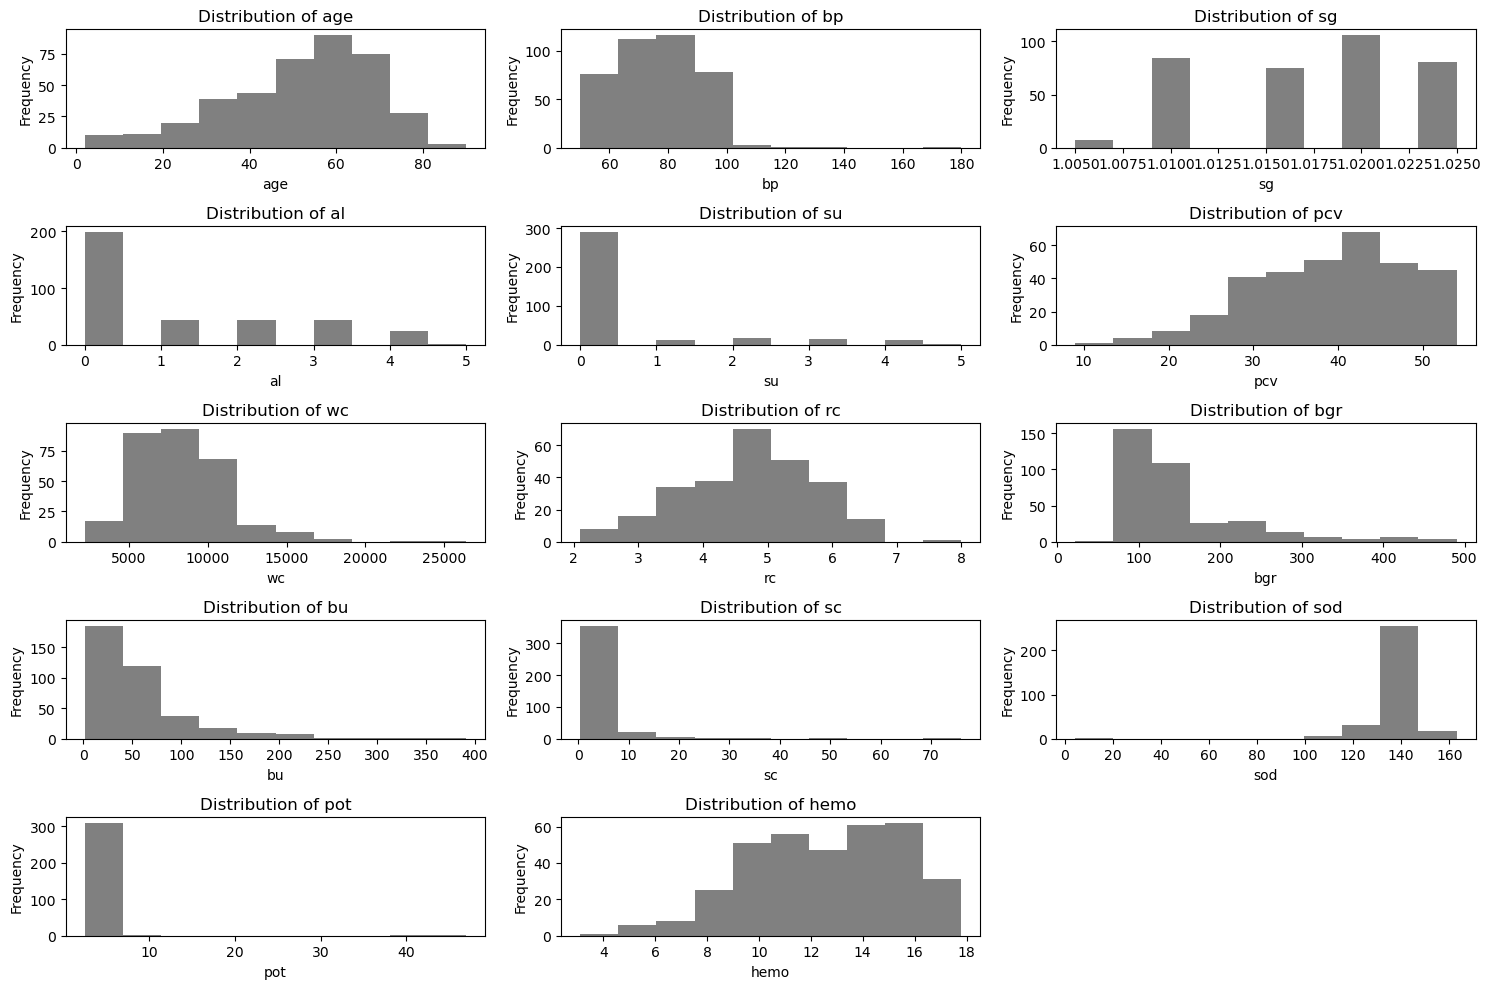

In [9]:
# Replace invalid values with NaN
df['pcv'] = df['pcv'].replace('\t?', np.nan)
df['wc'] = df['wc'].replace('\t?', np.nan)
df['rc'] = df['rc'].replace('\t?', np.nan)


# Convert the columns to float
df['pcv'] = df['pcv'].astype(float)
df['wc'] = df['wc'].astype(float)
df['rc'] = df['rc'].astype(float)

#plotting the non-categorical columns
non_cat = ["age", "bp", "sg", "al", "su","pcv","wc","rc", "bgr", "bu", "sc", "sod", "pot", "hemo"]


# Calculate the number of rows and columns for the subplot grid
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(non_cat) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Adjust the figsize as needed

# Plot histograms for each non-categorical column
for i, column in enumerate(non_cat):
    row = i // num_cols  # Calculate the row index for the current subplot
    col = i % num_cols  # Calculate the column index for the current subplot

    axes[row, col].hist(df[column], bins=10, color='grey')  # Adjust the number of bins as needed
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Distribution of {column}')

# Delete unused subplots and adjust layout
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [10]:
#check for duplicates
print("duplicate rows check:") 
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicates)

duplicate rows check:
Number of duplicate rows: 0


In [11]:
#get the feature variables
X = df.iloc[:,:-1]
#get the outcome variables
y = df.iloc[:, -1]

In [12]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,11.3,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,9.6,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,15.7,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,16.5,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,15.8,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
y

id
0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    float64
 6   pc              335 non-null    float64
 7   pcc             396 non-null    float64
 8   ba              396 non-null    float64
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [15]:
#check for and print NaN values
nan_values = df.isnull().sum()
print(nan_values)

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


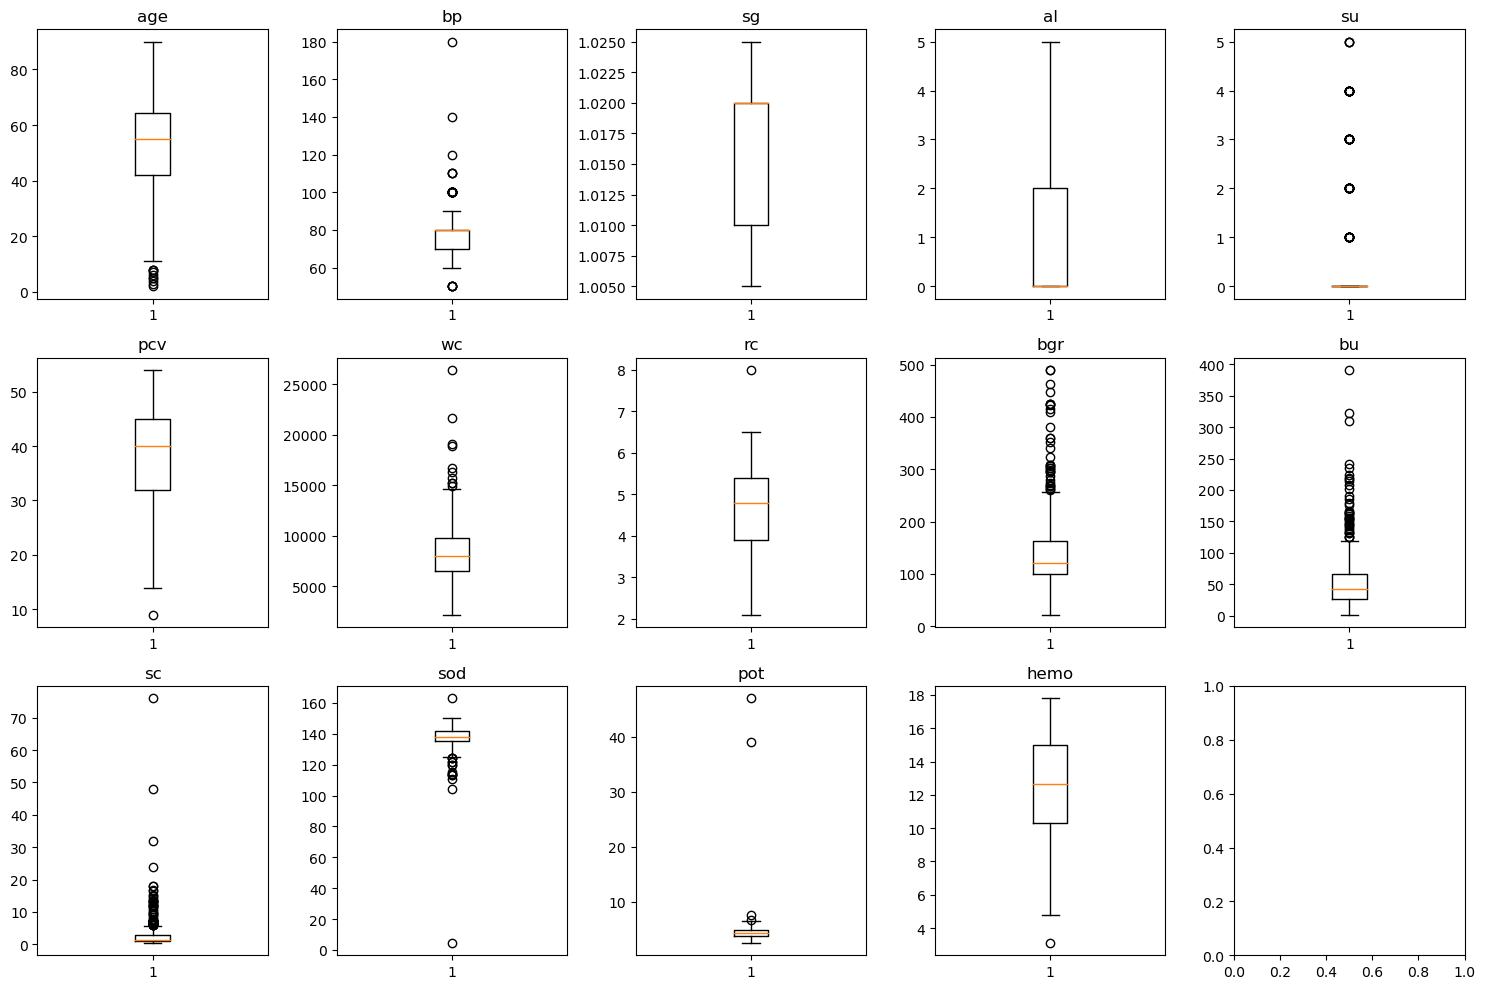

In [16]:
#check for outliers in the non-cat columns and replace with mean

# Create a box plot for each column
fig, axes = plt.subplots(nrows=(len(non_cat) // 5) + 1, ncols=5, figsize=(15, 10))

for i, column in enumerate(non_cat):
    ax = axes[i // 5, i % 5]
    ax.boxplot(df[column].dropna())
    ax.set_title(column)

# Remove unused subplots
for j in range(len(non_cat), len(non_cat) // 5 + 1 * 5):
    fig.delaxes(axes[j // 5, j % 5])

plt.tight_layout()
plt.show()

In [17]:
#replace NaN with mean
# Replace NaN values with the mean
X = X.fillna(X.mean())

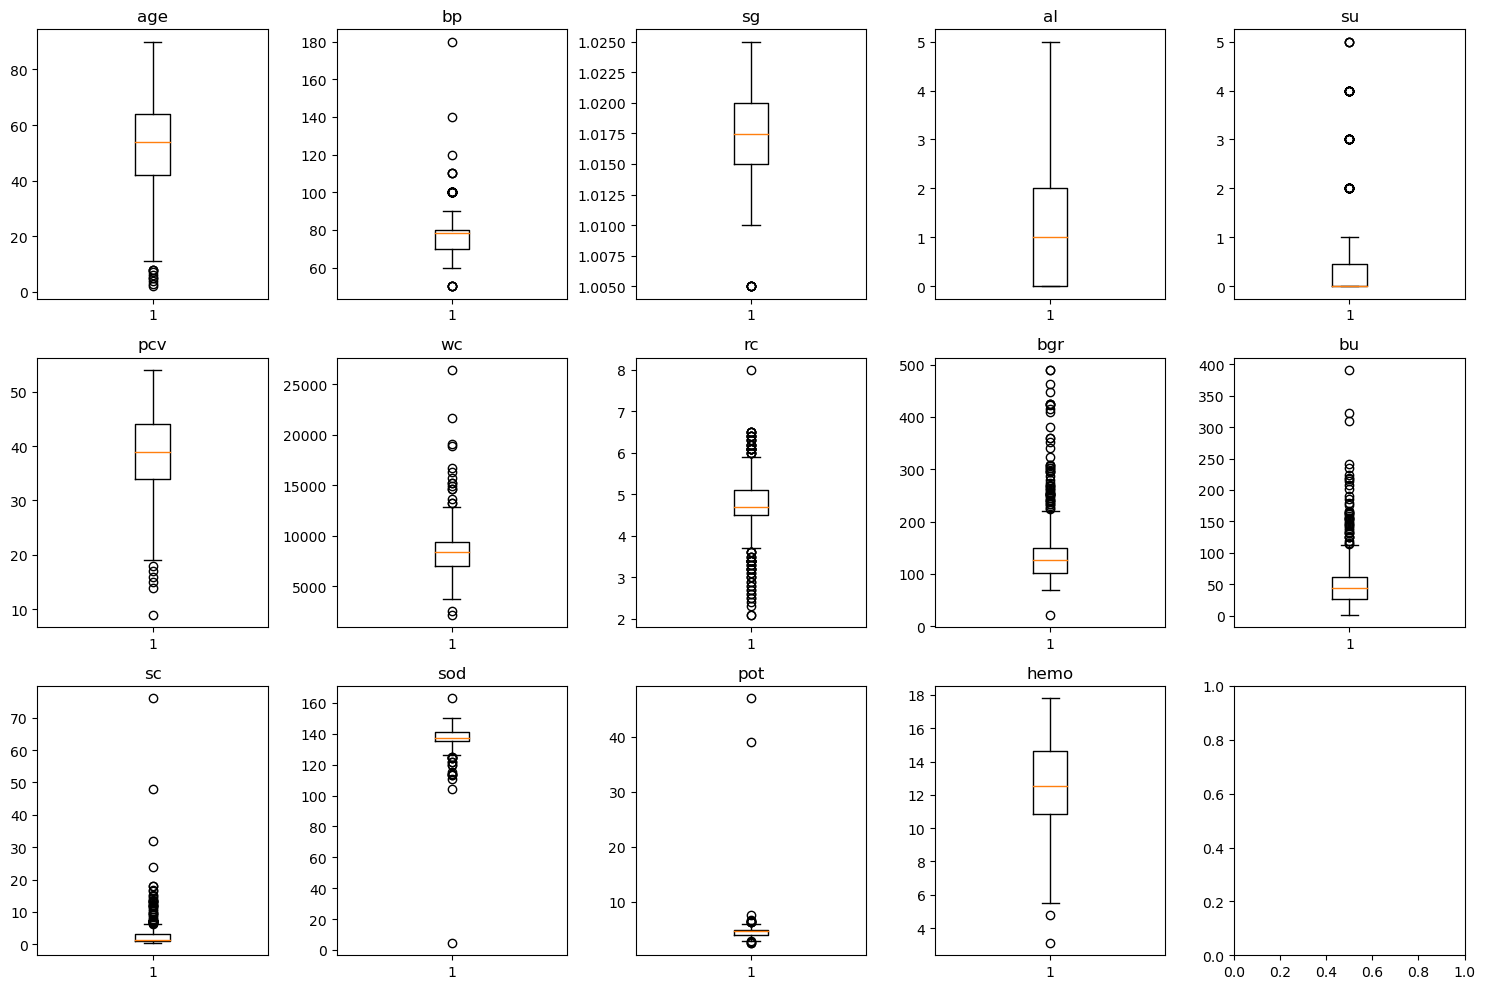

In [18]:
# Create a box plot for each column
fig, axes = plt.subplots(nrows=(len(non_cat) // 5) + 1, ncols=5, figsize=(15, 10))

for i, column in enumerate(non_cat):
    ax = axes[i // 5, i % 5]
    ax.boxplot(X[column].dropna())
    ax.set_title(column)

# Remove unused subplots
for j in range(len(non_cat), len(non_cat) // 5 + 1 * 5):
    fig.delaxes(axes[j // 5, j % 5])

plt.tight_layout()
plt.show()

In [19]:
X.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.000000,1.020,1.0,0.0,0.810484,1.000000,0.0,0.0,121.000000,...,15.4,44.0,7800.000000,5.200000,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.000000,1.020,4.0,0.0,0.810484,1.000000,0.0,0.0,148.036517,...,11.3,38.0,6000.000000,4.707435,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.000000,1.010,2.0,3.0,1.000000,1.000000,0.0,0.0,423.000000,...,9.6,31.0,7500.000000,4.707435,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.000000,1.005,4.0,0.0,1.000000,0.000000,1.0,0.0,117.000000,...,11.2,32.0,6700.000000,3.900000,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.000000,1.010,2.0,0.0,1.000000,1.000000,0.0,0.0,106.000000,...,11.6,35.0,7300.000000,4.600000,0.0,0.0,0.0,1.0,0.0,0.0
5,60.0,90.000000,1.015,3.0,0.0,0.810484,0.773134,0.0,0.0,74.000000,...,12.2,39.0,7800.000000,4.400000,1.0,1.0,0.0,1.0,1.0,0.0
6,68.0,70.000000,1.010,0.0,0.0,0.810484,1.000000,0.0,0.0,100.000000,...,12.4,36.0,8406.122449,4.707435,0.0,0.0,0.0,1.0,0.0,0.0
7,24.0,76.469072,1.015,2.0,4.0,1.000000,0.000000,0.0,0.0,410.000000,...,12.4,44.0,6900.000000,5.000000,0.0,1.0,0.0,1.0,1.0,0.0
8,52.0,100.000000,1.015,3.0,0.0,1.000000,0.000000,1.0,0.0,138.000000,...,10.8,33.0,9600.000000,4.000000,1.0,1.0,0.0,1.0,0.0,1.0


In [20]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [21]:
#use a pipeline to normalize the feature variables then conduct rfc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipeline = Pipeline([('scaler', MinMaxScaler()), ('rfc', RandomForestClassifier())])

In [23]:
# Fit the pipeline to the data
pipeline.fit(X_train, y_train)

rf_classifier = pipeline.named_steps['rfc']



# Make predictions
predictions = rf_classifier.predict(X_test)

In [24]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9


# Discussion:Accuracy
The model achieved an accuracy of 92%. This means that the model correctly classified 92% of the samples in the dataset. Therefore indicating that the model performed well in  predicting the target variable as majority of the samples were predicted correctly.

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=predictions)
cm

array([[35,  3],
       [ 7, 55]])

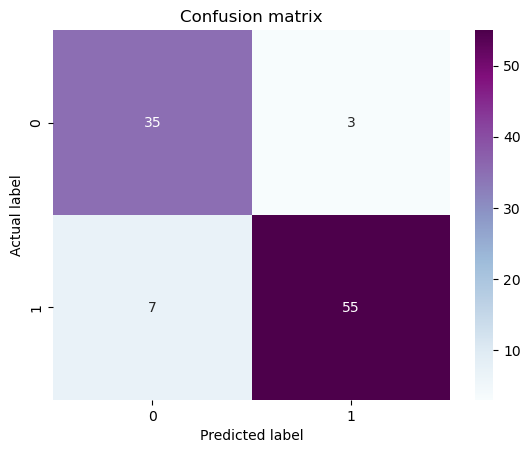

In [26]:
# Plot confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(cm, annot=True, cmap="BuPu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.savefig('cm_ckd.png')
plt.show()

# Discussion: Confusion matrix 
The model correctly classified 35 samples as negative and 57 samples as positive out of the total 38 positive and 62 negative samples respectively.
The model incorrectly classified 3 samples as positive when they were actually negative (false positives).
The model incorrectly classified 5 samples as negative when they were actually positive (false negatives).

In [27]:
from sklearn.metrics import classification_report
# evaluate the confusion matrix using classification report
target_names = ['without ckd', 'with ckd']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

 without ckd       0.83      0.92      0.88        38
    with ckd       0.95      0.89      0.92        62

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



# Discussion: Classification report
The accuracy is good at 92%. 

1. For the "without ckd" class:

* Precision: 0.88 means that out of all the samples predicted as "without ckd", 88% were correctly classified.
* Recall: 0.92 means that out of all the actual "without ckd" samples, 92% were correctly classified.
* F1-score: 0.90 is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for this class.
* Support: 38 samples belong to the "without ckd" class.

2. For the "with ckd" class:

* Precision: 0.95 means that out of all the samples predicted as "with ckd", 95% were correctly classified.
* Recall: 0.92 means that out of all the actual "with ckd" samples, 92% were correctly classified.
* F1-score: 0.93 is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for this class.
* Support: 62 samples belong to the "with ckd" class.

Overall, the classification report shows that the model performs well, with high precision, recall, and F1-score values for both classes, indicating a good ability to distinguish between the "with diabetes" and "without diabetes" classes. The high accuracy and consistent performance across metrics suggest that the model is reliable for this classification task.

In [28]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Print feature importances
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance}")

age: 0.009483813452028408
bp: 0.005217526072939581
sg: 0.14136533337228097
al: 0.08172893752186247
su: 0.01268952021891195
rbc: 0.07558439191001089
pc: 0.009727596485781035
pcc: 0.0006828915265835658
ba: 0.00038009399254776356
bgr: 0.02482492715325721
bu: 0.009914540320396254
sc: 0.06462455647170894
sod: 0.023135427864658994
pot: 0.008307323693343392
hemo: 0.17182584406288373
pcv: 0.23945805679348933
wc: 0.007549094397104741
rc: 0.041327493361352566
htn: 0.02047839096636727
dm: 0.040706916259483465
cad: 8.501353132040198e-05
appet: 0.008365104093324322
pe: 0.002398999805618833
ane: 0.0001382066727439433


In [29]:
# Create a list of (feature_name, importance) pairs
importance_list = [(feature_name, importance) for feature_name, importance in zip(X.columns, feature_importances)]

# Sort the list in descending order based on importance
importance_list.sort(key=lambda x: x[1], reverse=True)

# Print the top 5 feature importances
print("Top 5 Feature Importances:")
for feature_name, importance in importance_list[:5]:
    print(f"{feature_name}: {importance}")

Top 5 Feature Importances:
pcv: 0.23945805679348933
hemo: 0.17182584406288373
sg: 0.14136533337228097
al: 0.08172893752186247
rbc: 0.07558439191001089


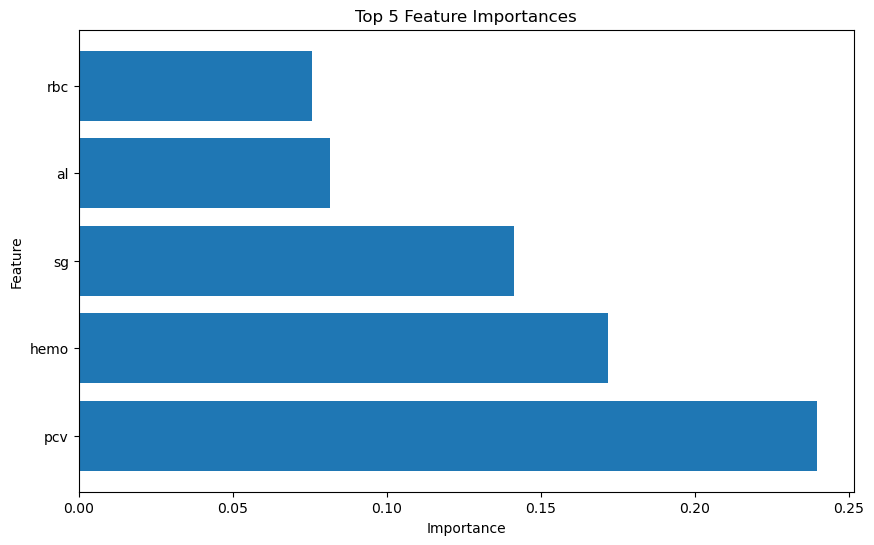

In [30]:
# Create a bar plot of feature for the top 5 importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance_list[:5])), [importance for _, importance in importance_list[:5]], align='center')
plt.yticks(range(len(importance_list[:5])), [feature_name for feature_name, _ in importance_list[:5]])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importances')
plt.savefig('features_ckd.png')
plt.show()

# Discussion: Importance features
The top 5 features with their corresponding importances are as follows:

Hemoglobin (hemo): This feature has the highest importance with a value of 0.1916. It indicates that the level of hemoglobin in the blood is a significant predictor for classifying whether a person has chronic kidney disease (CKD) or not.

Packed Cell Volume (pcv): The pcv feature has the second-highest importance with a value of 0.1663. It represents the volume percentage of red blood cells in the blood and is also a crucial indicator for distinguishing between CKD and non-CKD cases.

Specific Gravity (sg): With an importance of 0.1102, the sg feature is the third most influential. It measures the density of urine and plays a role in identifying kidney abnormalities.

Red Blood Cell Count (rbc): The rbc feature holds an importance value of 0.1069. It provides information about the count of red blood cells in the blood, and its significance suggests its relevance in detecting CKD.

Albumin (al): With an importance of 0.0828, the al feature is the fifth most important. It measures the presence of albumin in urine, which can be an indicator of kidney dysfunction.

These top 5 features collectively contribute significantly to the random forest classifier's decision-making process. They reflect the importance of blood and urine parameters related to kidney function in determining the presence of chronic kidney disease. By considering these features, the model can make accurate predictions and provide insights into the factors that contribute most to the classification task.